<p style="text-align:center">
    <a href="https://www.theforage.com/virtual-internships/NkaC7knWtjSbi6aYv">
    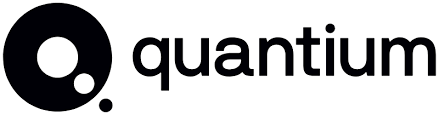
    </a>
</p>
<h1 align="center"><font size="5">Quantium Virtual Internship - Retail Strategy and Analytics</font></h1>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 1px">
    <ul>
    <li><a href="https://#Section_1">Task 1: Data Preparation and Customer Analytics</a></li>
    <li><a href="https://#Section_2">Task 2: Experimentation and uplift testing</a></li>
    <li><a href="https://#Section_3">Task 3: Analytics and commercial application </a></li>
</a></li>
</div>

<hr>

# Task 2: Experimentation and uplift testing

## 2.1 Background information

The clients want us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores. We will  evaluate the performance of a store trial which was performed in stores 77, 86 and 88 and examine the performance in trial vs control stores to provide a recommendation for each location based on our insight

### Main task
- **Select control stores** – explore the data and define metrics for control store selection
    - Think about what would make them a control store
    - Look at the drivers and make sure you visualise these in a graph to better determine if they are suited.
    - Write a function to reduce having to re-do the analysis for each trial store.: Consider using *Pearson correlations or a metric such as a magnitude distance* e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.
    
- **Assessment of the trial** – this one should give you some interesting insights into each of the stores
    - Check each trial store individually in comparison with the control store to get a clear view of its overall performance.
    - We want to know if the trial stores were successful or not: test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.
    
- **Collate findings** – summarise your findings for each store and provide an recommendation outlining the impact on sales during the trial period.

## 2.2 Select control store

The client has selected store numbers **77, 86 and 88** as trial stores and want control stores to be established stores that are operational for the entire observation period.
We would want to match trial stores to control stores that are similar to the trial store prior to **the trial period of Feb 2019** in terms of :
- Monthly overall sales revenue
- Monthly number of customers

The data range from 2018-07-01 to 2019-06-30

In [16]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import pearsonr

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")
## changer notebook render
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

# use regular expression
import re

In [17]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [18]:
# read the data
df = pd.read_csv("QVI_data_quantium.csv", parse_dates=['DATE'])
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [19]:
# Create a month column
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y-%m')
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  YEAR_MONTH        264834 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memor

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10-01
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09-01
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03-01
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03-01
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11-01


In [21]:
# Calulate the Monthly overall sales revenue, number of customers, number of transactions per customer,
# number of chips per customer, average price per unit
df_month = df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg({'TOT_SALES':'sum',
                                                        'LYLTY_CARD_NBR':'nunique',
                                                        'TXN_ID':'nunique',
                                                        'PROD_QTY':'sum'}).reset_index()
df_month.rename({'TOT_SALES':'Total Sales',
                 'LYLTY_CARD_NBR':'Number of Customers',
                 'TXN_ID':'nTrans',
                 'PROD_QTY':'nChips'}, axis=1, inplace=True)

df_month['nTransPerCust'] = df_month['nTrans'] / df_month['Number of Customers']
df_month['nChipsPerCust'] = df_month['nChips'] / df_month['Number of Customers']
df_month['avgPricePerUnit'] = df_month['Total Sales'] / df_month['nChips']
df_month.drop(['nTrans', 'nChips'], axis=1, inplace=True)

df_month.info()
df_month.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STORE_NBR            3169 non-null   int64         
 1   YEAR_MONTH           3169 non-null   datetime64[ns]
 2   Total Sales          3169 non-null   float64       
 3   Number of Customers  3169 non-null   int64         
 4   nTransPerCust        3169 non-null   float64       
 5   nChipsPerCust        3169 non-null   float64       
 6   avgPricePerUnit      3169 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 173.4 KB


,STORE_NBR,YEAR_MONTH,Total Sales,Number of Customers,nTransPerCust,nChipsPerCust,avgPricePerUnit
0,1,2018-07-01,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08-01,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09-01,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10-01,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11-01,192.6,46,1.021739,1.239130,3.378947


In [22]:
# drop stores that don't have enough records for all 12 months
month_counts = df_month.groupby(['STORE_NBR']).agg({'YEAR_MONTH':'nunique'}).reset_index()
store_full_months = month_counts[month_counts['YEAR_MONTH'] == 12]['STORE_NBR']
df_full_months = df_month[df_month['STORE_NBR'].isin(store_full_months)]
df_full_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STORE_NBR            3120 non-null   int64         
 1   YEAR_MONTH           3120 non-null   datetime64[ns]
 2   Total Sales          3120 non-null   float64       
 3   Number of Customers  3120 non-null   int64         
 4   nTransPerCust        3120 non-null   float64       
 5   nChipsPerCust        3120 non-null   float64       
 6   avgPricePerUnit      3120 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 195.0 KB


In [23]:
# Get the period before Feb 2019 to compare
df_before_feb2019 = df_full_months[df_full_months['YEAR_MONTH'] < '2019-02']
df_before_feb2019['YEAR_MONTH'].unique()

array(['2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [24]:
all_stores = df_before_feb2019['STORE_NBR'].unique()
# def a function to compare each trial store to all store to choose control stores
def compare_store(trial_store, all_stores, df):
    metrics = ['Total Sales', 'Number of Customers']
    df_trial = df[df['STORE_NBR'] == trial_store].reset_index(drop=True)
    choose_store = pd.DataFrame({'trial_store':[],'control_store':[],'PearsonCorr':[], 'magnitude':[]})
    for control_store in all_stores:
        df_store = df[df['STORE_NBR'] == control_store].reset_index(drop=True)
        pearson = []
        magnitude = []
        for metric in metrics:
            # Pearson's correlation
            cor_value = pearsonr(df_trial[metric], df_store[metric])[0]
            pearson.append(abs(cor_value))

            # magnitude distance 1-(Observed distance – minimum distance)/(Maximum distance – minimum distance)
            diff = abs(df_trial[metric] - df_store[metric])
            magnitude_value = np.mean(1 - (diff - min(diff))/(max(diff) - min(diff)))
            magnitude.append(abs(magnitude_value))

        pearson_score = np.mean(pearson)
        magnitude_score = np.mean(magnitude)
        choose_store = pd.concat([choose_store, pd.DataFrame({'trial_store':trial_store,
                                                             'control_store':control_store,
                                                             'PearsonCorr':pearson_score,
                                                             'magnitude':magnitude_score}, index=[len(choose_store)])])

    ## Combine the 2 metrics: average
    choose_store['avg_score'] = (choose_store['PearsonCorr'] + choose_store['magnitude'])/2
    return choose_store.sort_values('avg_score', ascending=False)

In [36]:
# function to plot control store and trial store based on the features
def plot_compare(trial_store, control_store, df):
    # add a column to identified trial store, control_store and other stores
    df_new = df.copy()
    conditions = [(df_new['STORE_NBR'] == trial_store), (df_new['STORE_NBR'] == control_store)]
    choices = [f'Trial Store {trial_store}', f'Control Store {control_store}']
    df_new['store_type'] = np.select(conditions, choices, default='Other Stores')
    columns_to_plot = ['Total Sales', 'Number of Customers']
    for column in columns_to_plot:
        df_plot = pd.pivot_table(df_new, values=[column],
                                index ='YEAR_MONTH', columns='store_type', aggfunc = 'mean')
        # reset index
        df_plot.columns = df_plot.columns.droplevel()
        df_plot.reset_index(inplace=True)
        df_plot.set_index('YEAR_MONTH', inplace=True)
        sns.lineplot(df_plot, markers=True)

        # Set the title and labels
        plt.title(column)
        plt.xlabel('Months')
        plt.ylabel(column)
        plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

        # Show the plot
        plt.show()

### Store 77

In [26]:
## Choose the store with the highest score as the control store
trial_store = 77
control_store_77 = compare_store(trial_store, all_stores, df_before_feb2019)
control_store_77.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
221,77.0,233.0,0.947066,0.566832,0.756949
67,77.0,71.0,0.834461,0.618158,0.726310
79,77.0,84.0,0.771460,0.600512,0.685986
111,77.0,119.0,0.925466,0.440309,0.682887
108,77.0,115.0,0.704020,0.649482,0.676751


Let's try to plot control store 233 and trial store 77


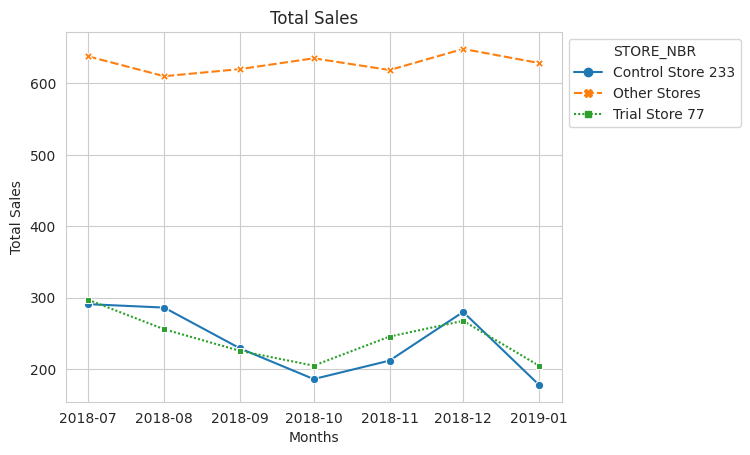

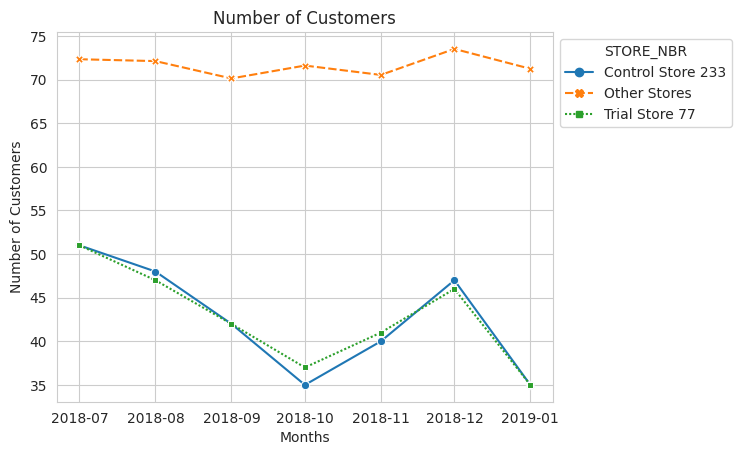

In [37]:
trial_store = 77
control_store = 233
plot_compare(trial_store, control_store, df_before_feb2019)

### Store 86

In [28]:
## Choose the store with the highest score as the control store
trial_store = 86
control_store_86 = compare_store(trial_store, all_stores, df_before_feb2019)

control_store_86.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
147,86.0,155.0,0.910379,0.631070,0.770724
102,86.0,109.0,0.779539,0.660113,0.719826
21,86.0,23.0,0.864128,0.490225,0.677177
257,86.0,270.0,0.748973,0.583904,0.666438
107,86.0,114.0,0.794877,0.499900,0.647389


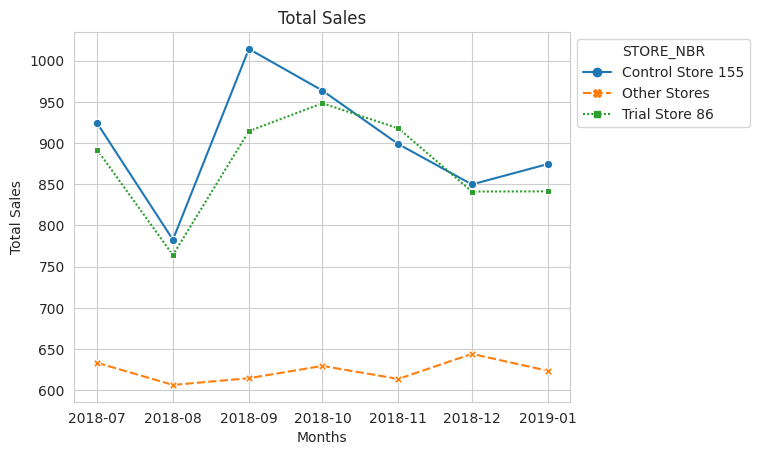

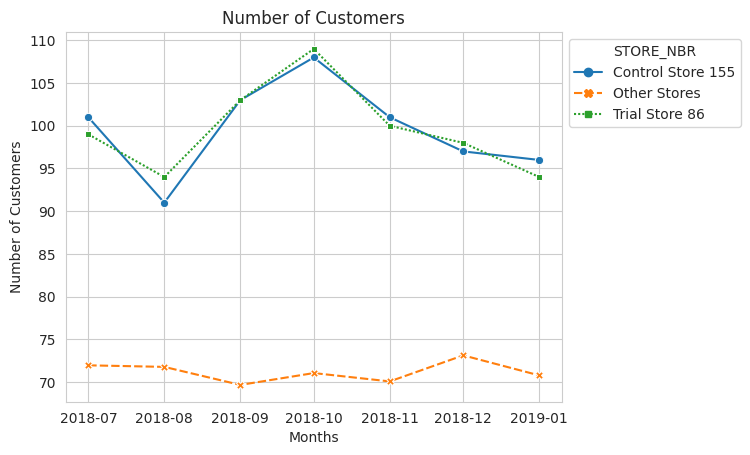

In [38]:
trial_store = 86
control_store = 155
plot_compare(trial_store, control_store, df_before_feb2019)

### Store 88

In [40]:
## Choose the store with the highest score as the control store
trial_store = 88
control_store_88 = compare_store(trial_store, all_stores, df_before_feb2019)

control_store_88.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
170,88.0,178.0,0.835661,0.522970,0.679316
12,88.0,14.0,0.820767,0.511071,0.665919
126,88.0,134.0,0.686587,0.628652,0.657619
125,88.0,133.0,0.785417,0.490129,0.637773
225,88.0,237.0,0.627903,0.601306,0.614604


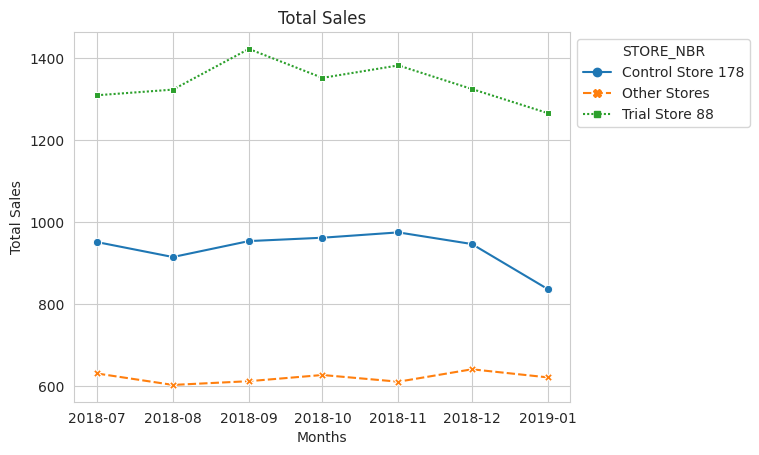

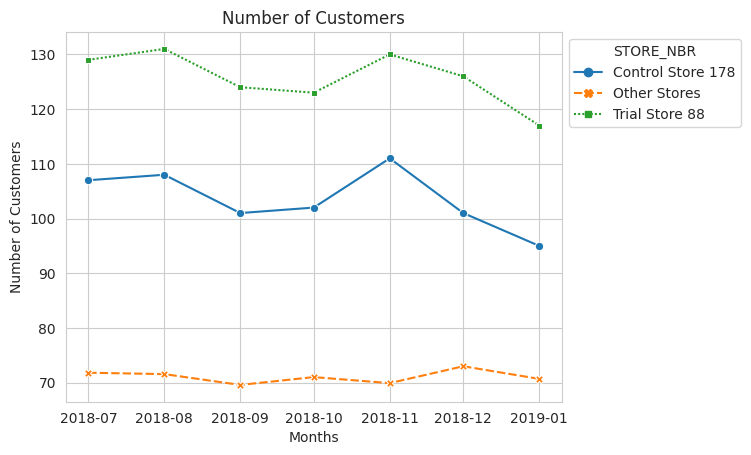

In [41]:
trial_store = 88
control_store = 178
plot_compare(trial_store, control_store, df_before_feb2019)

Store 178 seemed to have the same trend as trial store 88 but the actual values are much different. Let's test other stores to see how the other stores compared to the trial store.

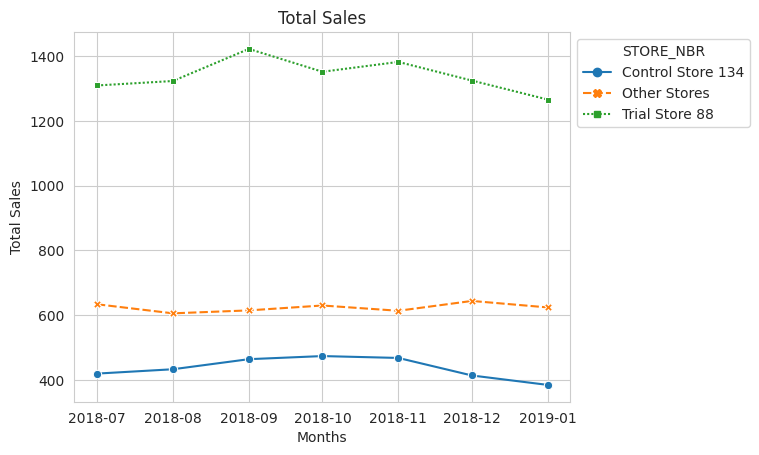

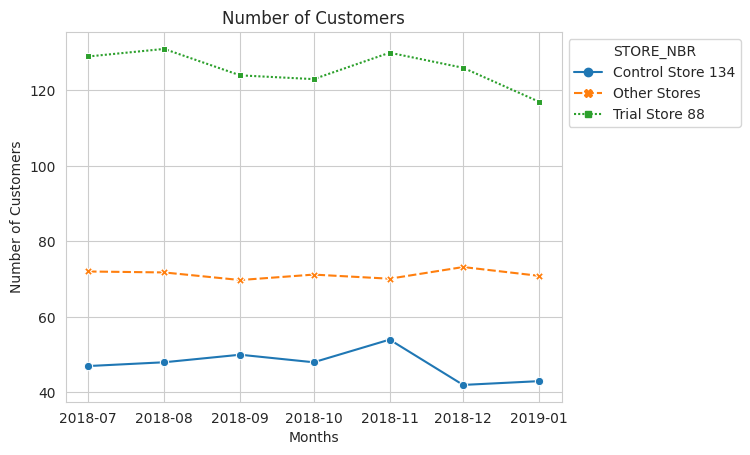

In [42]:
trial_store = 88
control_store = 134
plot_compare(trial_store, control_store, df_before_feb2019)

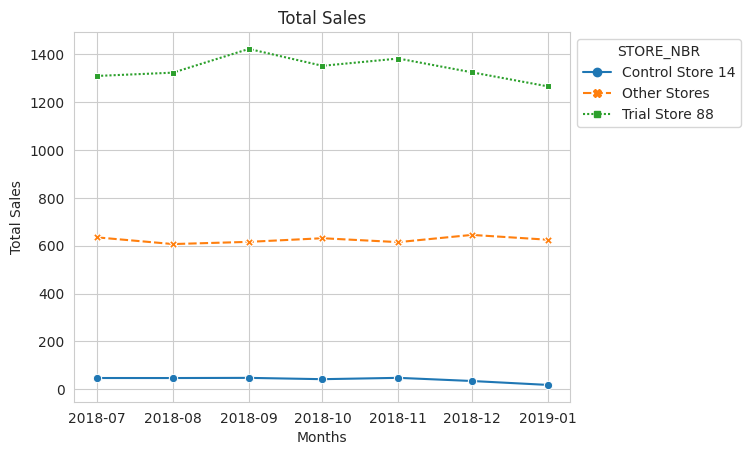

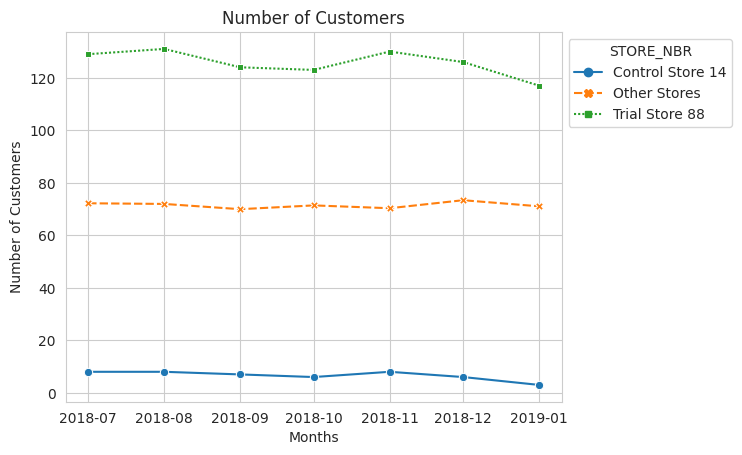

In [43]:
trial_store = 88
control_store = 14
plot_compare(trial_store, control_store, df_before_feb2019)

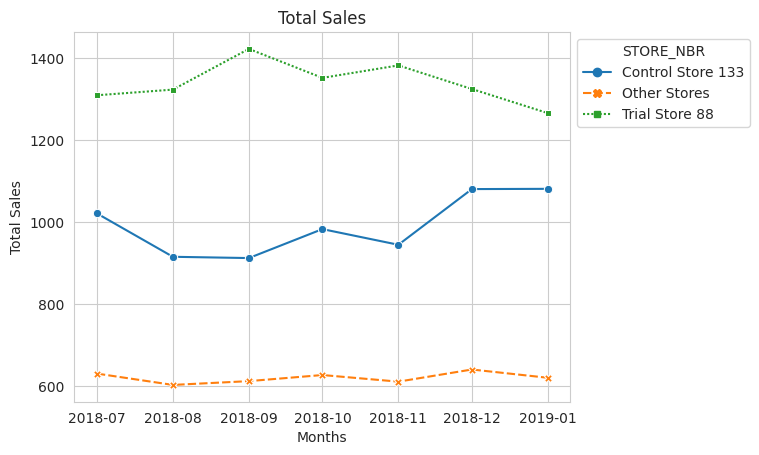

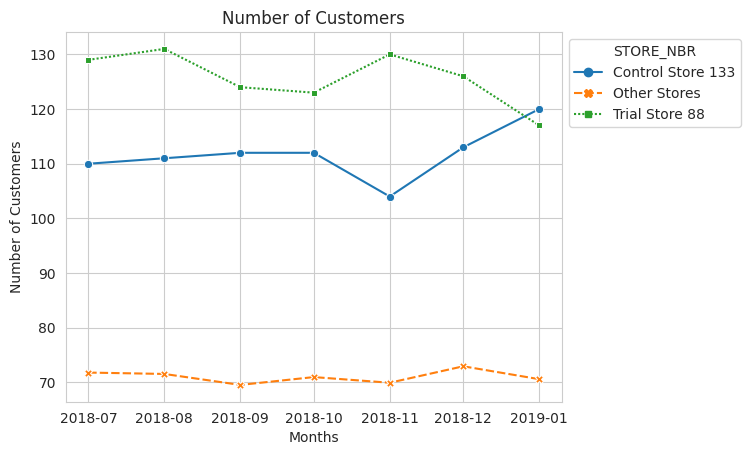

In [44]:
trial_store = 88
control_store = 133
plot_compare(trial_store, control_store, df_before_feb2019)

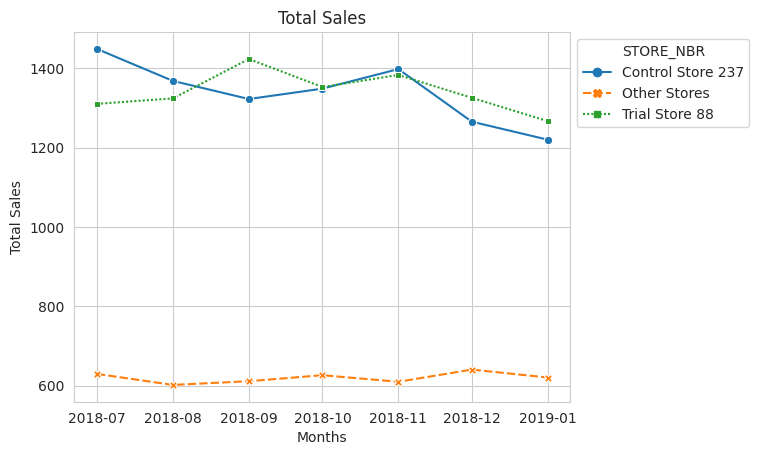

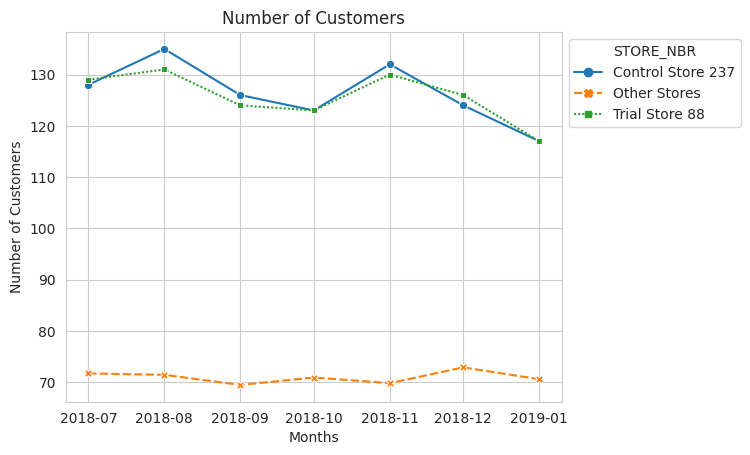

In [45]:
trial_store = 88
control_store = 237
plot_compare(trial_store, control_store, df_before_feb2019)

Store 237 seemed to be the best fit

## 2.2. Assessment of trial

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

### Store 77

In [68]:
# Scale pre-trial control sales to match pre-trial trial store sales
trial_store = 77
control_store = 233
df_pre_trail = df_before_feb2019[df_before_feb2019['STORE_NBR'] == trial_store]
df_pre_control = df_before_feb2019[df_before_feb2019['STORE_NBR'] == control_store]
scale = (df_pre_trail['Total Sales'].sum()) / (df_pre_control['Total Sales'].sum())
print(f"Pre-trial scale: {scale}")

Pre-trial scale: 1.023617303289553


In [69]:
# get the scaled value for control store
control_store = 233
df_control_scaled = df_month[df_month['STORE_NBR'] == control_store].copy()
df_control_scaled['Control sales'] = df_control_scaled['Total Sales']*scale
df_control_scaled

,STORE_NBR,YEAR_MONTH,Total Sales,Number of Customers,nTransPerCust,nChipsPerCust,avgPricePerUnit,Control sales
2699,233,2018-07-01,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,2018-08-01,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,2018-09-01,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,2018-10-01,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,2018-11-01,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,2018-12-01,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,2019-01-01,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,2019-02-01,244.0,45,1.044444,1.555556,3.485714,249.762622
2707,233,2019-03-01,199.1,40,1.025000,1.475000,3.374576,203.802205
2708,233,2019-04-01,158.6,30,1.066667,1.533333,3.447826,162.345704


In [70]:
# Calculate the percentage difference between scaled control sales and trial sales
df_diff = pd.merge(df_control_scaled[['YEAR_MONTH','Control sales']], df_month[df_month['STORE_NBR'] == trial_store][['YEAR_MONTH','Total Sales']],
                   on='YEAR_MONTH', how='inner')
df_diff.rename(columns={'Total Sales':'Trial sales'}, inplace=True)
df_diff['percent_diff'] = abs(df_diff['Control sales'] - df_diff['Trial sales'])/df_diff['Control sales']
df_diff

,YEAR_MONTH,Control sales,Trial sales,percent_diff
0,2018-07-01,297.565550,296.8,0.002573
1,2018-08-01,292.652187,255.5,0.126950
2,2018-09-01,233.998916,225.2,0.037602
3,2018-10-01,190.085733,204.5,0.075830
4,2018-11-01,216.597421,245.3,0.132516
5,2018-12-01,286.408121,267.3,0.066716
6,2019-01-01,181.692071,204.4,0.124980
7,2019-02-01,249.762622,235.0,0.059107
8,2019-03-01,203.802205,278.5,0.366521
9,2019-04-01,162.345704,263.5,0.623080


In [71]:
# test the hypothesis that the sales difference is significant: use t-test
# import tatistics Libraries
from statistics import stdev
from scipy.stats import t

# calculate the standard deviation of the percen_diff during trials
std_trails = stdev(df_diff[df_diff['YEAR_MONTH'] < '2019-02']['percent_diff'])
print(f"Standard deviation pre trials: {std_trails}")

# note that there are 8 months in the pre‐trial period hence 8 ‐ 1 = 7 degrees of freedom
degrees_of_freedom = 7

# We will test with a null hypothesis of there being 0 difference between  trial and control stores.
df_diff['tValue'] = (df_diff['percent_diff'] - 0) / std_trails
t_values = df_diff.loc[(df_diff['YEAR_MONTH'] < '2019-05') & (df_diff['YEAR_MONTH'] > '2019-01'), ['YEAR_MONTH', 'tValue']]
print(t_values)


# calculate 95th percentile of t-distribution with appropriate degrees of freedom
t_crit = t.ppf(0.95, df=degrees_of_freedom)
print(f'\nValue at 95th percentile: {t_crit}')

Standard deviation pre trials: 0.049940762641425364
  YEAR_MONTH     tValue
7 2019-02-01   1.183534
8 2019-03-01   7.339116
9 2019-04-01  12.476373

Value at 95th percentile: 1.894578605061305


Null hypothesis: The sales before and after trial is the same

Both Critical values for March and April are larger than which means those values we can reject the null hypothesis for those 2 months. The difference in sales of trial store in trail period of March and April is statistically significant

In [72]:
# Let's plot the sales of the control store, the sales of the trial stores
# and the 95th percentile value of sales of the control store
df_sales = df_diff.drop(columns=['percent_diff', 'tValue'], axis=1)
df_sales['5th percentile'] = df_sales['Control sales']*(1 - 2*std_trails)
df_sales['95th percentile'] = df_sales['Control sales']*(1 + 2*std_trails)
df_sales.set_index('YEAR_MONTH', inplace=True)
df_sales

,Control sales,Trial sales,5th percentile,95th percentile
YEAR_MONTH,,,,
2018-07-01,297.565550,296.8,267.844249,327.286851
2018-08-01,292.652187,255.5,263.421640,321.882734
2018-09-01,233.998916,225.2,210.626747,257.371084
2018-10-01,190.085733,204.5,171.099680,209.071786
2018-11-01,216.597421,245.3,194.963341,238.231502
2018-12-01,286.408121,267.3,257.801241,315.015001
2019-01-01,181.692071,204.4,163.544390,199.839753
2019-02-01,249.762622,235.0,224.815950,274.709294
2019-03-01,203.802205,278.5,183.446130,224.158280


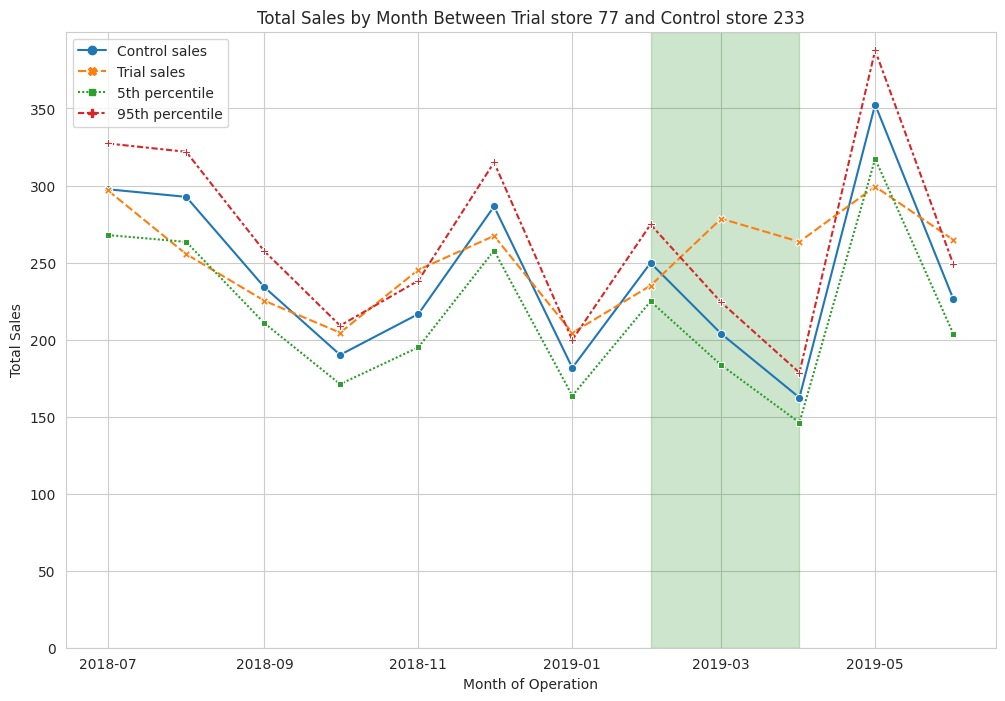

In [74]:
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_sales, markers=True)
ax.set_title('Total Sales by Month Between Trial store 77 and Control store 233')
ax.set_xlabel('Month of Operation')
ax.set_ylabel('Total Sales')
ax.set_ylim(ymin=0)
ax.axvspan('2019-02-01', '2019-04-01', color='green', alpha = 0.2)
plt.legend()
plt.show()

We can see the sales values of trail store in March and April are outside the [5th percentile, 95th percentile] confident interval which mean the sales are significantly different before the trial and in the trial for those 2 months.

Let's create a function to repeat the step for different columns and stores.

In [75]:
def assess_trial(trial_store, control_store, column, df_trial=df_before_feb2019, df_full=df_month):
  # Scale pre-trial control sales to match pre-trial trial store sales
  df_pre_trail = df_trial[df_trial['STORE_NBR'] == trial_store]
  df_pre_control = df_trial[df_trial['STORE_NBR'] == control_store]
  scale = (df_pre_trail[column].sum()) / (df_pre_control[column].sum())
  print(f"Pre-trial scale: {scale}")

  # get the scaled value for control store
  df_control_scaled = df_full[df_full['STORE_NBR'] == control_store].copy()
  df_control_scaled[f'Control {column}'] = df_control_scaled[column]*scale
  df_control_scaled

  # Calculate the percentage difference between scaled control sales and trial sales
  df_diff = pd.merge(df_control_scaled[['YEAR_MONTH',f'Control {column}']], df_full[df_full['STORE_NBR'] == trial_store][['YEAR_MONTH',column]],
                     on='YEAR_MONTH', how='inner')
  df_diff.rename(columns={column:f'Trial {column}'}, inplace=True)
  df_diff['percent_diff'] = abs(df_diff[f'Control {column}'] - df_diff[f'Trial {column}'])/df_diff[f'Control {column}']

  # calculate the standard deviation of the percen_diff during trials
  std_trails = stdev(df_diff[df_diff['YEAR_MONTH'] < '2019-02']['percent_diff'])
  print(f"Standard deviation pre trials: {std_trails}")

  # note that there are 8 months in the pre‐trial period hence 8 ‐ 1 = 7 degrees of freedom
  degrees_of_freedom = 7

  # We will test with a null hypothesis of there being 0 difference between  trial and control stores.
  df_diff['tValue'] = (df_diff['percent_diff'] - 0) / std_trails
  t_values = df_diff.loc[(df_diff['YEAR_MONTH'] < '2019-05') & (df_diff['YEAR_MONTH'] > '2019-01'), ['YEAR_MONTH', 'tValue']]
  print(t_values)


  # calculate 95th percentile of t-distribution with appropriate degrees of freedom
  t_crit = t.ppf(0.95, df=degrees_of_freedom)
  print(f'\nValue at 95th percentile: {t_crit}')

  # Let's plot the sales of the control store, the sales of the trial stores
  df_plot = df_diff.drop(columns=['percent_diff', 'tValue'], axis=1)
  df_plot['5th percentile'] = df_plot[f'Control {column}']*(1 - 2*std_trails)
  df_plot['95th percentile'] = df_plot[f'Control {column}']*(1 + 2*std_trails)
  df_plot.set_index('YEAR_MONTH', inplace=True)

  plt.figure(figsize = (12, 8))
  sns.set_style("whitegrid")
  ax = sns.lineplot(df_plot, markers=True)
  ax.set_title(f'{column} by Month Between Trial store {trial_store} and Control store {control_store}')
  ax.set_xlabel('Month of Operation')
  ax.set_ylabel(column)
  ax.set_ylim(ymin=0)
  ax.axvspan('2019-02-01', '2019-04-01', color='green', alpha = 0.2)
  plt.legend()
  plt.show()

Pre-trial scale: 1.0033557046979866
Standard deviation pre trials: 0.018240748558243945
  YEAR_MONTH     tValue
7 2019-02-01   0.183352
8 2019-03-01  13.476388
9 2019-04-01  30.778725

Value at 95th percentile: 1.894578605061305


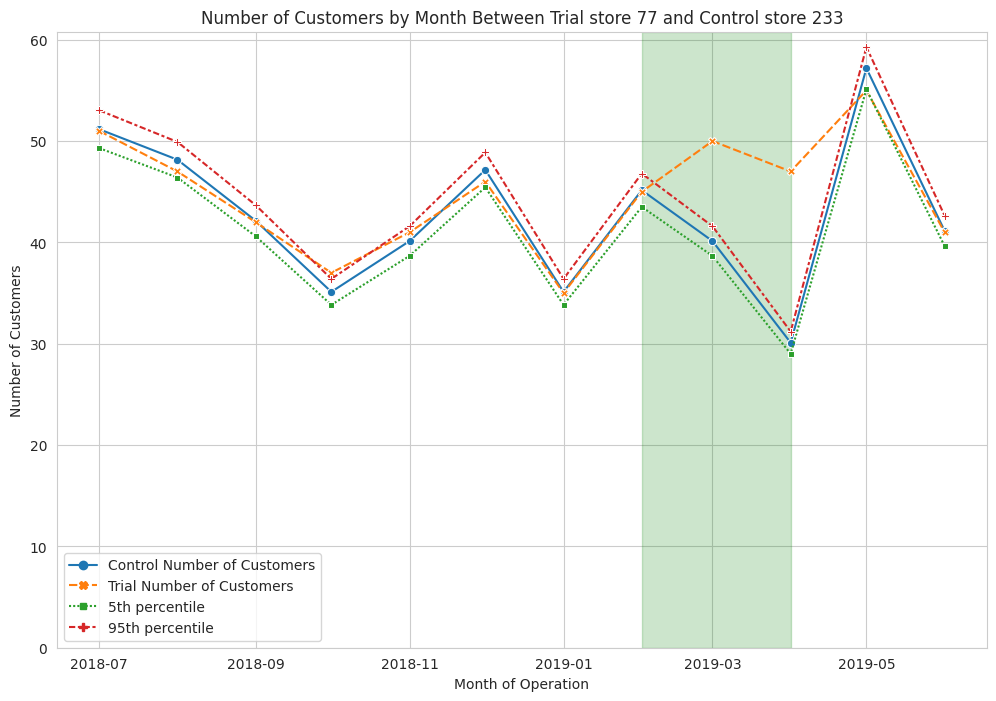

In [76]:
# repeat for all other stores
trial = 77
control = 233
column = 'Number of Customers'
assess_trial(trial_store=trial, control_store=control, column=column)

### Store 86

Pre-trial scale: 0.9700651481287743
Standard deviation pre trials: 0.02583395285477237
  YEAR_MONTH     tValue
7 2019-02-01   2.179542
8 2019-03-01  12.226922
9 2019-04-01   1.364580

Value at 95th percentile: 1.894578605061305


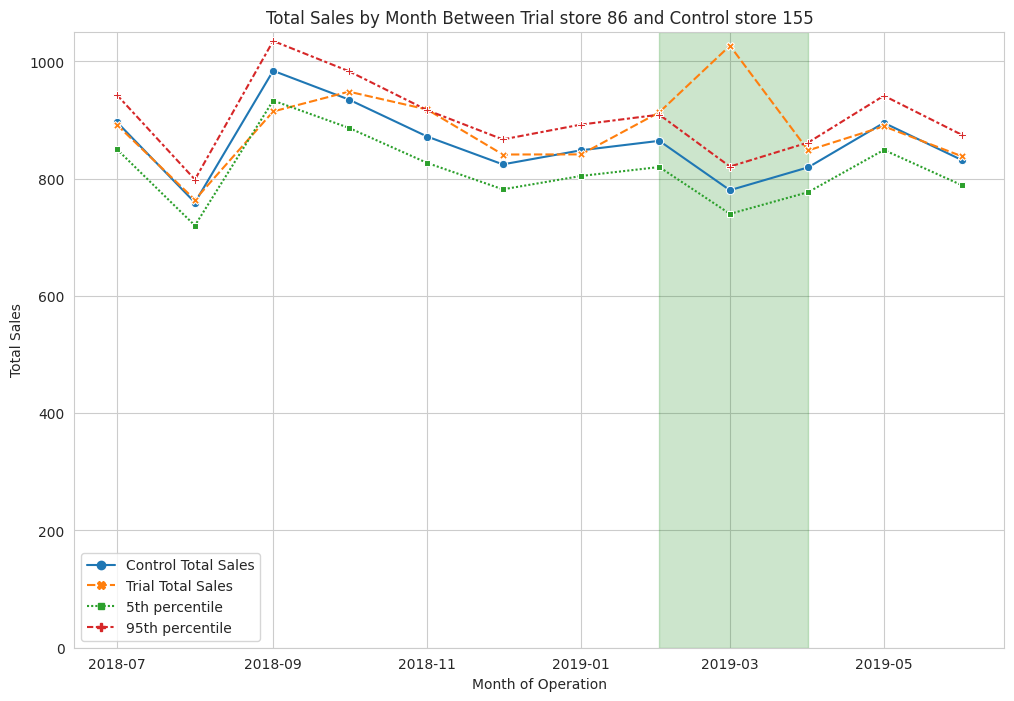

In [77]:
# repeat for all other stores
trial = 86
control = 155
column = 'Total Sales'
assess_trial(trial_store=trial, control_store=control, column=column)

Pre-trial scale: 1.0
Standard deviation pre trials: 0.010687444701395238
  YEAR_MONTH     tValue
7 2019-02-01  11.819082
8 2019-03-01  20.903430
9 2019-04-01   5.670772

Value at 95th percentile: 1.894578605061305


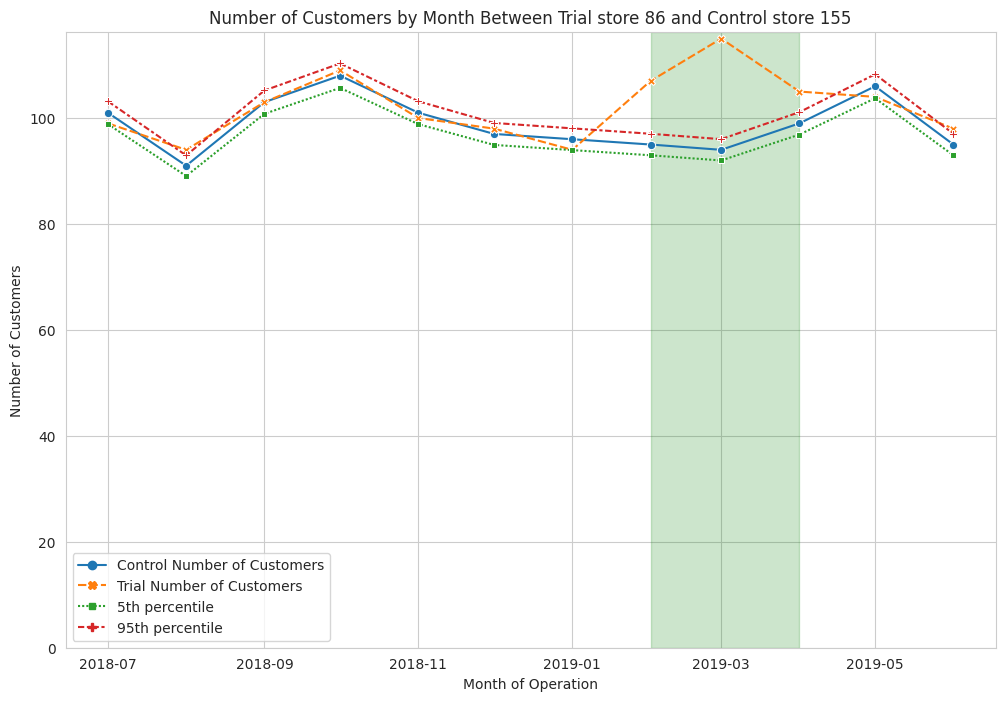

In [78]:
# repeat for all other stores
trail_store = 86
control_store = 155
column = 'Number of Customers'
assess_trial(trail_store, control_store, column=column)

### Store 88

Pre-trial scale: 1.001558330664959
Standard deviation pre trials: 0.0334678673030788
  YEAR_MONTH    tValue
7 2019-02-01  0.781270
8 2019-03-01  6.595668
9 2019-04-01  5.768527

Value at 95th percentile: 1.894578605061305


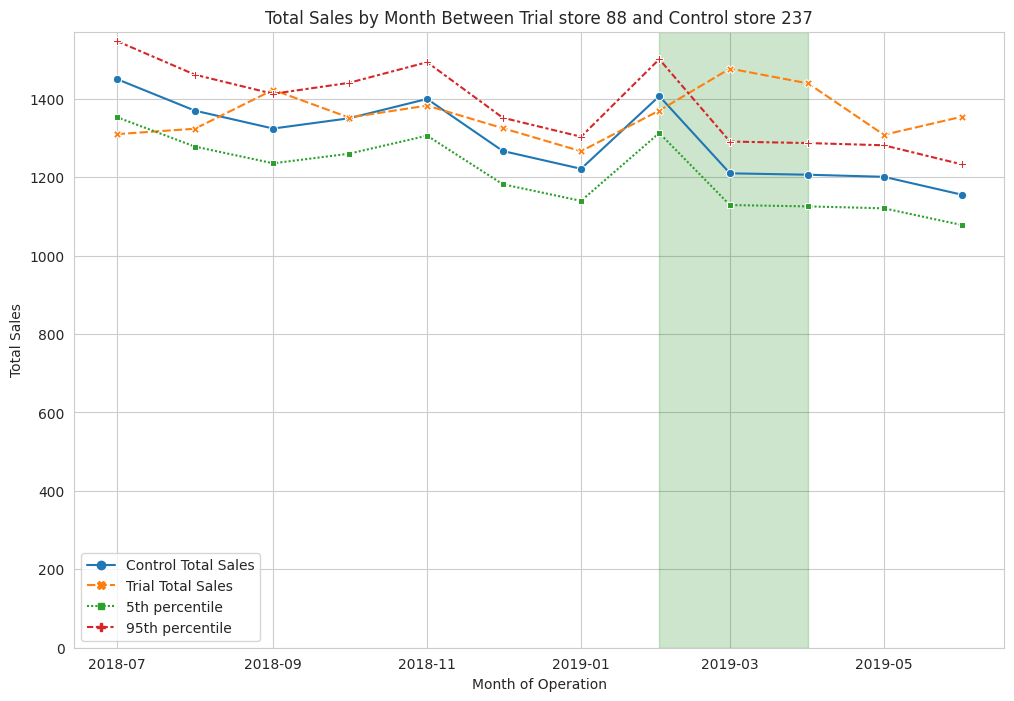

In [79]:
# repeat for all other stores
trial = 88
control = 237
column = 'Total Sales'
assess_trial(trial_store=trial, control_store=control, column=column)

Pre-trial scale: 0.9943502824858758
Standard deviation pre trials: 0.00741024435207507
  YEAR_MONTH     tValue
7 2019-02-01   1.387456
8 2019-03-01  17.873693
9 2019-04-01   9.814423

Value at 95th percentile: 1.894578605061305


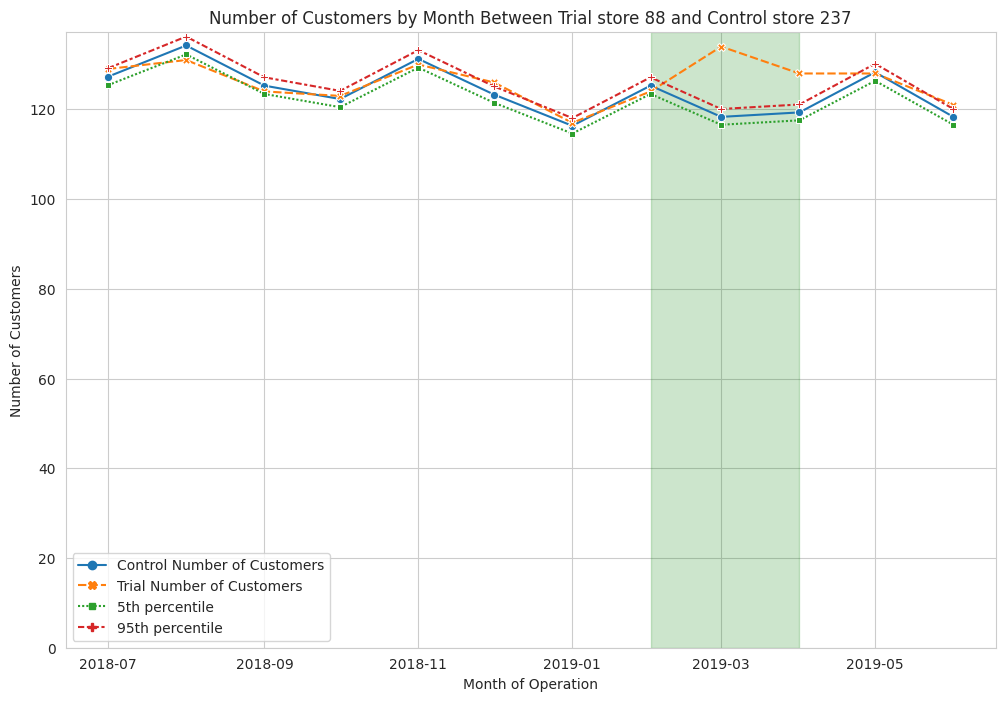

In [80]:
# repeat for all other stores
trial = 88
control = 237
column = 'Number of Customers'
assess_trial(trial_store=trial, control_store=control, column=column)

## 2.3. Collate findings

Control stores for trial stores 77, 86 and 88 are 233, 155, 237 respectively.
- Trial store 77 saw a statistically significant increase in Total Sales and Number of Customers visit in 2/3 months of trial period (March and April).
- Trial store 86 saw a statistically significant increase in Number of Customers visit in all 3 months of trial period. Total Sales, however, only experienced a slight increase in February and a surge in March.
- Trial store 88 saw a statistically significant increase in Sales and Total Sales and Number of Customers visit in 2/3 months of trial period (March and April).


In summary:
- All 3 trail stores experienced increase in sales and number of customers for at least one month of the trial period
- After the trial, all trial stores’ sales and number of customers are not statistically different from control stores


We'll might need to ask further if any special promotion or events are running at those stores.